# Python introduction

_Edited from https://github.com/daliagachc/negi-stuff/_


## Why Python?

<img align="left" style="padding-right:10px;" src="imgs/stack_plot.svg" width="800">

<small>(Source: [Stack Overflow](https://goo.gl/YwPocq))</small>

# Jupyter

<img align="left" style="padding-right:10px;" src="imgs/jupyter_logo.png" width="200">

<img align="left" style="padding-right:10px;" src="imgs/jup_img.png" width="500">

## Why do we use jupyter lab?
- Easy to use, easy to share!
    - You can share code, plots and text together --> makes easy to follow description of your work 
- Work interactively with your data
    - Plot, make change, replot and have all of it together together in one document
    - Also remotely
- Reproducability
- Almost an IDE


![](imgs/Fieldnotes_jlab.png)
[Jupyter org](http://jupyter.org/)

# Jupyter Notebooks 
## Web Resources

- [The IPython website](http://ipython.org): The IPython website links to documentation, examples, tutorials, and a variety of other resources.
- [The nbviewer website](http://nbviewer.jupyter.org/): This site shows static renderings of any IPython notebook available on the internet. The front page features some example notebooks that you can browse to see what other folks are using IPython for!
- [A gallery of interesting Jupyter Notebooks](https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks/): This ever-growing list of notebooks, powered by nbviewer, shows the depth and breadth of numerical analysis you can do with IPython. It includes everything from short examples and tutorials to full-blown courses and books composed in the notebook format!
- Video Tutorials: searching the Internet, you will find many video-recorded tutorials on IPython. I'd especially recommend seeking tutorials from the PyCon, SciPy, and PyData conferenes by Fernando Perez and Brian Granger, two of the primary creators and maintainers of IPython and Jupyter.

## Basic jupyter lab:

### Mark down cell
Latex formatting:
$x^2 = y^2 + z^2$

**Longer:**
\begin{align}
x+1 =& 2 \\
x =& 2-1
\end{align}

_Italic_

### Code cell:

In [23]:
x=1
y=2
x+y

3

### Contextual help:
click CTRL + i

In [24]:
import numpy as np
a = np.array([1,2,3])
np.max(a)

3

## Basic python

### Plotting

Let's make some random data

- Plot two lineplot
- Add xlabel, ylabel, title, legend
- make a scatter plot
- customize linewidth/size, alpha, etc
- set xlim, ylim

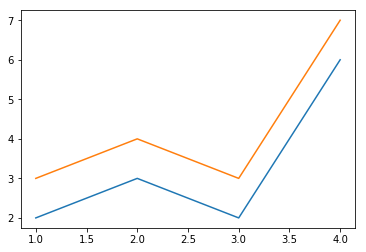

In [48]:
import matplotlib.pyplot as plt
x= [1,2,3,4]
y= np.array([2,3,2,6])
y2 = y+1
plt.plot(x,y)
plt.plot(x,y2)
# ADD xlabel, ylabel and title

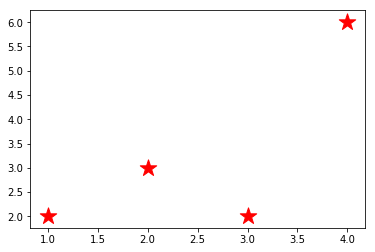

In [45]:
plt.scatter(x,y, c='r', marker='*', s=300)

## Super small pandas example:

In [76]:
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
tser = pd.read_csv('sample_data/daily-min-temperatures.csv',index_col=0,parse_dates=True)
tser = tser['Temp']
tser_mm = tser.resample('M').mean()
tser_sd = tser.resample('M').std()
tser_clim_mm = tser.groupby(by=tser.index.month).mean()
tser_clim_sd = tser.groupby(by=tser.index.month).std()

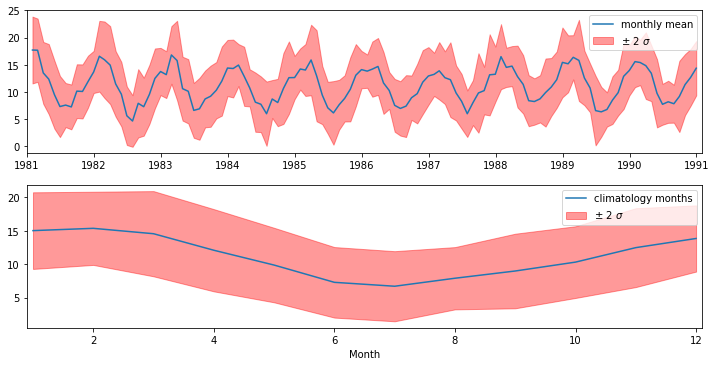

In [95]:
fig, axs = plt.subplots(2,1, figsize=[10,5])
axs[0].fill_between(tser_mm.index, (tser_mm-2*tser_sd), tser_mm+2*tser_sd, 
                    alpha=.4, color='r', label=r'$\pm$ 2 $\sigma$')
axs[0].plot(tser_mm.index, tser_mm, label='monthly mean')
axs[0].legend()
axs[1].fill_between(tser_clim_mm.index, (tser_clim_mm-2*tser_clim_sd), 
                    tser_clim_mm+2*tser_clim_sd, 
                    alpha=.4, color='r', label=r'$\pm$ 2 $\sigma$')
axs[1].plot(tser_clim_mm.index, tser_clim_mm, label='climatology months')
axs[1].legend()
plt.tight_layout()
axs[1].set_xlabel('Month')
axs[1].set_xlim([.9,12.1])
axs[0].set_xlim('1981-1', '1991-02')
plt.show()


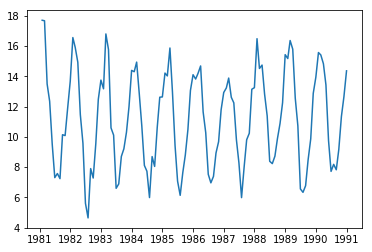

In [96]:
import matplotlib.pyplot as plt
plt.plot(time, temp)
plt.show()

## Make a function when you do things multiple times!
E.g. the plot above!